# Diabetes Classification - ImBalanced data without Meds
[Jose R. Zapata](https://joserzapata.github.io)
- https://joserzapata.github.io
- https://twitter.com/joserzapata
- https://www.linkedin.com/in/jose-ricardo-zapata-gonzalez/       


## Introduction


Analyze factors related to readmission as well as other outcomes pertaining to patients in order to classify a patient-hospital outcome.

3 different outputs:

1. No readmission

2. A readmission in less than `30` days (this situation is not good, because maybe your treatment was not appropriate);

3. A readmission in more than 30 days (this one is not so good as well the last one, however, the reason could be the state of the patient.

Hospital readmissions can negatively impact cost and patient outcomes.

Reported in [Why do patients keep coming back? Results of a Readmitted Patient Survey](https://www.tandfonline.com/doi/abs/10.1080/00981389.2014.966881), the results of a patient survey developed as part of regular hospital quality assurance activities. Two-thirds of patients reported good discharge experiences but were still readmitted. One-third of patients discharged had a post-discharge doctor appointment scheduled; half were readmitted before that scheduled appointment.


## Main Objective

> **How effective was the treatment received in hospital?** 

## Principal References

### Paper

Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.

https://www.hindawi.com/journals/bmri/2014/781670/

### Dataset

https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008#

### Data description

https://www.hindawi.com/journals/bmri/2014/781670/tab1/

# Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import model_selection
import plotly.express as px

# Load Dataset

In [2]:
data = pd.read_csv("../data/processed/data_imbalanced.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53214 entries, 0 to 53213
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      53214 non-null  object
 1   age                       53214 non-null  object
 2   admission_type_id         53214 non-null  int64 
 3   discharge_disposition_id  53214 non-null  int64 
 4   admission_source_id       53214 non-null  int64 
 5   time_in_hospital          53214 non-null  int64 
 6   medical_specialty         53214 non-null  object
 7   num_lab_procedures        53214 non-null  int64 
 8   num_procedures            53214 non-null  int64 
 9   num_medications           53214 non-null  int64 
 10  number_outpatient         53214 non-null  int64 
 11  number_emergency          53214 non-null  int64 
 12  number_inpatient          53214 non-null  int64 
 13  diag_1                    53214 non-null  object
 14  diag_2                

#### Remove Near Zero Variance

This medications had near zero Variance, they can have a little influence in the result. but remeved this fefatures, reduce the fact of generate dummy variables and increase the computation complexities (mostly related with over fitting). Accordingly  i will remove these medications variables.

- repaglinide: 98.8% = No
- nateglinide: 99.3% = No
- chlorpropamide: 99.9 = No
- acetohexamide: 99.9% = No
- tolbutamide: 99.9% = No
- acarbose: 99.7% = No
- miglitol: 99.9% = No
- troglitazone: 99.9% = No
- tolazamide: 99.9% = No
- glyburide-metformin: = 99.3%
- glipizide-metformin: = 99.9%
- metformin-rosiglitazone: = 99.9%
- metformin-pioglitazone: = 99.9%

In [4]:
meds = ['repaglinide', 'nateglinide', 'chlorpropamide', 'acarbose', 'miglitol', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

In [5]:
data.drop(meds,axis=1,inplace=True)

## Encode categorical colums

In [6]:
cat_cols = list(data.select_dtypes('object').columns)
class_dict = {}
for col in cat_cols:
    data = pd.concat([data.drop(col, axis=1), pd.get_dummies(data[col], prefix=col, drop_first=True)], axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53214 entries, 0 to 53213
Data columns (total 71 columns):
 #   Column                                             Non-Null Count  Dtype
---  ------                                             --------------  -----
 0   admission_type_id                                  53214 non-null  int64
 1   discharge_disposition_id                           53214 non-null  int64
 2   admission_source_id                                53214 non-null  int64
 3   time_in_hospital                                   53214 non-null  int64
 4   num_lab_procedures                                 53214 non-null  int64
 5   num_procedures                                     53214 non-null  int64
 6   num_medications                                    53214 non-null  int64
 7   number_outpatient                                  53214 non-null  int64
 8   number_emergency                                   53214 non-null  int64
 9   number_inpatient            

## Input and output data

Get the names of input features and output feature

In [8]:
X = data.drop("readmitted", axis=1)
y= data["readmitted"]

In [9]:
X.shape

(53214, 70)

In [10]:
y.shape

(53214,)

## Split dataset 70/30

70% to train the model
30% to test the model

Split data stratify = y because the dataset is imbalanced

In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state =123, stratify=y)

In [12]:
perc_test = y_test.value_counts()[1]*100/len(y_test)
perc_train = y_train.value_counts()[1]*100/len(y_train)

print(f" Percentage of positives in test set={perc_test} , train set={perc_train}")

Percentage of positives in test set=4.046351393673661 , train set=4.0457461945287125


# MODELS

## Evaluation Metric

The selected evaluation metric is the 
> **Recall - Sensitivity**

A False Negative might delay more tests or treatment, 
however a False Positive may just lead to more tests or treatments – not as costly as putting a life at stake.


In [13]:
# Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Interpretability is important so first intents will be with classic Machine Learning Models, No ensembles, No Neural Networks

In [14]:
# Selected algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

## Model Selection

In [15]:
seed =2
models = []

#logistic Regression
models.append(('LR', LogisticRegression(solver='liblinear')))

# Decision Tree classifier
models.append(('CART', DecisionTreeClassifier()))

# Naïve Bayes
models.append(('NB', GaussianNB()))
# SVM
models.append(('SVM', SVC(C=1.0, kernel='rbf', max_iter=1000, tol=1e-3)))
# evaluate each model in turn
results = []
names = []
scoring = 'recall'
for name, model in models:
	# Kfol cross validation for model selection
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	#X train , y train
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = f"({name}, {cv_results.mean()}, {cv_results.std()}"
	print(msg)

(LR, 0.009961300139693334, 0.006012387607913651
(CART, 0.116808691098926, 0.011494018251329499
(NB, 0.5453137871542366, 0.039290522622135365
(SVM, 0.7678108257966272, 0.036711827582408145


## Results

In [16]:
result_df = pd.DataFrame(results, index=names).T
px.box(result_df,title = 'Algorithm Comparison')

# Hyperparameter Tunning

SVC model

In [48]:
from sklearn.model_selection import GridSearchCV

In [50]:
parameters = {'kernel': ['linear', 'rbf', 'poly'], 
           'C': [0.1, 1.0, 10.0, 100.0, 1000.0], 
            'gamma': [0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC( max_iter=1000, tol=1e-3), parameters, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_

KeyboardInterrupt: 

# evaluation Test set

In [39]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_precision_recall_curve

## Naïve Bayes

In [40]:
NB = GaussianNB()
NB.fit(X_train,y_train)
y_pred = NB.predict(X_test)

In [41]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.97      0.71      0.82     15319
           1       0.07      0.52      0.13       646

    accuracy                           0.71     15965
   macro avg       0.52      0.62      0.47     15965
weighted avg       0.94      0.71      0.79     15965



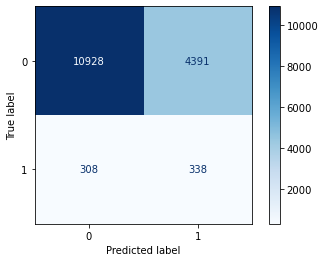

In [42]:
plot_confusion_matrix(NB, X_test, y_test,cmap=plt.cm.Blues); 

In [43]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp+fn)
sensitivity

0.5232198142414861

In [44]:
Negative_predictive_value = tn /(tn+fn)
Negative_predictive_value

0.9725881096475614

## SVM

In [45]:
SVM = SVC(C=1.0, kernel='rbf', max_iter=1000, tol=1e-3)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)

In [46]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.97      0.23      0.37     15319
           1       0.04      0.82      0.08       646

    accuracy                           0.25     15965
   macro avg       0.51      0.52      0.22     15965
weighted avg       0.93      0.25      0.36     15965



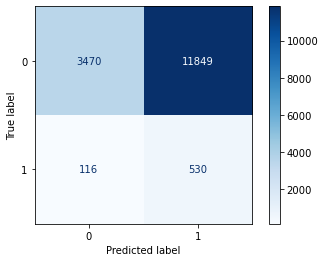

In [47]:
plot_confusion_matrix(SVM, X_test, y_test,cmap=plt.cm.Blues); 

In [49]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp+fn)
sensitivity

0.8204334365325078

In [ ]:
Negative_predictive_value = tn /(tn+fn)
Negative_predictive_value

# Model Interpretability
The selected Model is the Naïve Bayes in a pipeline with a standard scaler,
the sensitivity result is higher

The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled 

In [32]:
from sklearn.inspection import permutation_importance

In [33]:
imps = permutation_importance(NB_pipeline, X_test, y_test, n_repeats = 5,scoring='recall', n_jobs=-1)

NameError: name 'NB_pipeline' is not defined

In [34]:
fig= plt.figure(figsize=(10,30))
perm_sorted_idx = imps.importances_mean.argsort()
plt.boxplot(imps.importances[perm_sorted_idx].T, vert=False,
            labels=X_test.columns[perm_sorted_idx])
plt.title("Permutation Importances (test set)");

NameError: name 'imps' is not defined

In [35]:
X_test.columns[perm_sorted_idx][-4:]

NameError: name 'perm_sorted_idx' is not defined

The change in this variables results in a drop of the recall - sensitivity, so this variables are important for the results
- 'medical_specialty_Surgery-Cardiovascular/Thoracic'
- 'medical_specialty_ObstetricsandGynecology'
- 'medical_specialty_Urology'
- 'chlorpropamide'

# Save Model

The selected Model is the Naïve Bayes in a pipeline with a standard scaler,
the sensitivity result is higher

In [36]:
from joblib import dump # libreria de serializacion

# garbar el modelo en un archivo
#dump(NB_pipeline, '../models/NB_pipeline_imbalance_recall.joblib')

# References

- Correction to: Hospital Readmission of Patients with Diabetes - https://link.springer.com/article/10.1007/s11892-018-0989-1

- Center for disease control and prevention, Diabetes atlas- https://gis.cdc.gov/grasp/diabetes/DiabetesAtlas.html

- https://medium.com/@joserzapata/paso-a-paso-en-un-proyecto-machine-learning-bcdd0939d387
- [a-complete-machine-learning-walk-through-in-python-part-one](https://towardsdatascience.com/a-complete-machine-learning-walk-through-in-python-part-one-c62152f39420)

- https://www.kaggle.com/vignesh1609/readmission-classification-model

- https://www.kaggle.com/kavyarall/predicting-effective-treatments/
- SVC - hyperparameter tunning
- Priors in GaussianNB https://stackoverflow.com/questions/30896367/how-to-specify-the-prior-probability-for-scikit-learns-naive-bayes
- permutation importance - https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance
- Permutation Importance example - https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-py
- Permutation Importance with multicollinear or correlated features- https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html

[Jose R. Zapata](https://joserzapata.github.io)
- https://joserzapata.github.io
- https://twitter.com/joserzapata
- https://www.linkedin.com/in/jose-ricardo-zapata-gonzalez/   